# ETL and ETA for listings, calender and reviews

## Bussiness Understanding
- Finding why the **'review_scores_rating'** of some of the host given by the customers are **low**? On what parameters, they have got bad review score?
- Is there any relationship between **host_response_time** of the host and **review_scores_rating**?
- Is correralation between **number_of_reviews** w.r.t other variables?
- Relation beween **host_response_time** and **availability_365**
- Relationship between **'host_is_superhost' and other varaibles like 'host_response_rate' and 'host_acceptance_rate'** to find out if there is a any pattern if **host is a superhost**
- Finding a new column: **'prices_per_bed'** by dividing 'prices' with number of 'beds' available.
- Finding the pattern of when **'host_is_superhost'** and how they are listing their property for **'minimum_nights'**
- **occupancy rate** w.r.t to other columns like **'availability_365', 'host_neighbourhood'**
- occupancy_rate = **percentage of days the rooms was available in a year**
- more occupancy_rate, the better
- Calculating **trend of discounts and prices of rooms**
- **Sentiment analysis**

## Findings
- There is **no direct relation between 'host_response_time' of the host and 'review_scores_rating'** by the customers
- Most of the people has given **less score for 'review_scores_accuracy' and 'review_scores_cleanliness'** as the frequency for low score is high for those columns. So, host should look into those areas to improve there performance.
- There exists **Negative correlation between 'availability_365' and 'number_of_reviews_ltm'**
- There exists **Negative correlation between 'price_per_bed' and 'number_of_reviews_ltm*'**
- There exists **Positive correlation between 'amenities_total' and 'number_of_reviews_ltm'**
- Hosts **who responds 'within an hour' has highest occupancy rate** and lowest 'availability_365' followed by 'within a few hours', 'within a day' and 'a few days or more'
- There are slightly more superhost than normal host
- There is a slightly high 'host_acceptance_rate' by the customers when host is superhost
- Most of the **hosts have given minimum nights as 1-10 or 30 or 90 days**
- When host is a **superhost**, they have given more importance to **minimum_nights in the range of (0, 5) days and then above 30 days**.
- When host is not a superhost, they have given less importance to minimum_nights in the range of (0, 5) and more importance to stay above 7 days, upto 30 days for more occupancy.
- Most of the property are listed as Entire apartment or Entire house followed by other listings
- Most of the room types is Entire house/apt followed by some private rooms
- The occupancy rate is high for shared rooms and hotel rooms, which has lowest listings, and almost equal for Private rooms and Entire house/apt
- Occupancy rate is high for even accommodates, except for 11 accomodates
- **High occupancy rate for 2-8 people**
- There is discrepancy in the data as the months mentioned are of year 2021
- Prices are high for Jun to Oct
- **High discounts are offered in Nov**
- **Prices are rooms are increased in Nov-Jan**
- Most visitors have given positive comments, followed by neutral and negative



#### Here, first we download the  3 csv file - mainly - listings.csv, calender.csv and reviews.csv for the seattle and analyse the dataset

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

In [2]:
#!pip install pandas-profiling --user

### Reading and analysing the listings.csv file

In [3]:
df_listings = pd.read_csv('listings.csv')
#df_listings.dropna(inplace=True)
df_listings.head()

id                        listing_url       scrape_id last_scraped  \
0  2318  https://www.airbnb.com/rooms/2318  20201025051148   2020-10-25   
1  9419  https://www.airbnb.com/rooms/9419  20201025051148   2020-10-25   
2  9531  https://www.airbnb.com/rooms/9531  20201025051148   2020-10-25   
3  9534  https://www.airbnb.com/rooms/9534  20201025051148   2020-10-25   
4  9596  https://www.airbnb.com/rooms/9596  20201025051148   2020-10-25   

                                                name  \
0  Casa Madrona - Urban Oasis 1 block from the park!   
1                Glorious sun room w/ memory foambed   
2                The Adorable Sweet Orange Craftsman   
3                   The Coolest Tangerine Dream MIL!   
4         the down home , spacious, central and fab!   

                                         description  \
0  Gorgeous, architect remodeled, Dutch Colonial ...   
1  Keeping you safe is our priority, we are adher...   
2  The Sweet Orange is a delightful and spacious ...   
3  Welcome to my delicious Tangerine Dream!  A co...   
4  We are in a great neighborhood, quiet, full of...   

                               neighborhood_overview  \
0  Madrona is a hidden gem of a neighborhood. It ...   
1  Lots of restaurants (see our guide book) bars,...   
2  The neighborhood is awesome!  Just far enough ...   
3  The neighborhood is the best of two worlds...w...   
4  if you arrive early for check in at 3,  I reco...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/02973ad3-a7a3...     2536   
1  https://a0.muscache.com/pictures/56645186/e5fb...    30559   
2  https://a0.muscache.com/pictures/30470355/052c...    31481   
3  https://a0.muscache.com/pictures/30476721/0751...    31481   
4  https://a0.muscache.com/pictures/665252/102d18...    14942   

                                  host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/2536  ...                        10.0   
1  https://www.airbnb.com/users/show/30559  ...                        10.0   
2  https://www.airbnb.com/users/show/31481  ...                        10.0   
3  https://www.airbnb.com/users/show/31481  ...                        10.0   
4  https://www.airbnb.com/users/show/14942  ...                         9.0   

  review_scores_location review_scores_value             license  \
0                   10.0                10.0  STR-OPLI-19-002837   
1                   10.0                10.0  str-opli-19-003039   
2                   10.0                10.0  STR-OPLI-19-002182   
3                   10.0                10.0  STR-OPLI-19-002182   
4                   10.0                 9.0  STR-OPLI-19-002622   

  instant_bookable calculated_host_listings_count  \
0                f                              2   
1                f                              8   
2                f                              2   
3                f                              2   
4                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           2   
1                                           0   
2                                           2   
3                                           2   
4                                           2   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            8   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.22  
1                                           0              1.19  
2                                           0              0.37  
3                                           0              0.50  
4                      

### EDA

In [4]:
import pandas_profiling as pp

In [5]:
pp.ProfileReport(df_listings, minimal=True)

In [6]:
df_listings.shape

(4335, 74)

So, there are total 4335 rows and 74 columns in the dataset.

Let's find if there is any dependency between 'host_response_time' of the host and 'review_scores_rating' by the customers

In [7]:
# Number of unique values in  column 'host_response_time'
df_listings['host_response_time'].unique()

array(['within a day', 'within a few hours', 'within an hour', nan,
       'a few days or more'], dtype=object)

In [8]:
df_listings[df_listings['host_response_time']=='within a day']['review_scores_rating'].mean()

95.62172284644194

In [9]:
df_listings[df_listings['host_response_time']=='within a few hours']['review_scores_rating'].mean()

96.3275

In [10]:
df_listings[df_listings['host_response_time']=='a few days or more']['review_scores_rating'].mean()

96.3913043478261

#### FIndings: Since all values: 95.62,  96.32 and 96.39 are almost equal and significantly high, there is no direct relation between 'host_response_time' of the host and 'review_scores_rating' by the customers

### Finding why the 'review_scores_rating' of some of the host are low. We are taking 85 as threshold to say that below the threshold, the host has not got good rating

In [11]:
#df_listings[df_listings['review_scores_rating'] < 85 ]

In [12]:
#df_listings[(df_listings['review_scores_rating'] < 85 ) & (df_listings['host_response_time']=='within a day')]

In [13]:
#df_listings[(df_listings['review_scores_rating'] < 85 ) & (df_listings['host_response_time']=='within a few hours')]

In [14]:
#df_listings[(df_listings['review_scores_rating'] < 85 ) & (df_listings['host_response_time']=='a few days or more')]

In [15]:
#df_listings[df_listings['review_scores_rating'] < 85 ]['host_response_time']

In [16]:
df_listing_low = df_listings[df_listings['review_scores_rating'] < 85 ][['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

In [17]:
df_listing_low.head()

review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
89                      7.0                        8.0                    7.0   
91                      9.0                        9.0                    9.0   
139                     8.0                        8.0                    9.0   
150                     9.0                        8.0                   10.0   
155                     9.0                        9.0                    9.0   

     review_scores_communication  review_scores_location  review_scores_value  
89                           7.0                     9.0                  7.0  
91                           9.0                     9.0                  8.0  
139                          9.0                     8.0                  8.0  
150                         10.0                     9.0                  9.0  
155                          9.0                     9.0                  8.0

Let's plot the all the different kinds of review scores mentioned in the dataset to find out, in which type of score, the hosts have receeived lowest values

<AxesSubplot:ylabel='Frequency'>

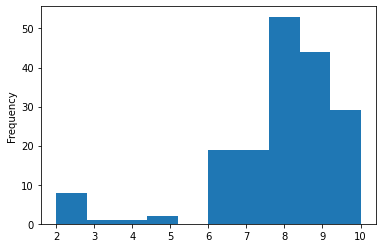

In [18]:
# For review_scores_accuracy
df_listing_low['review_scores_accuracy'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

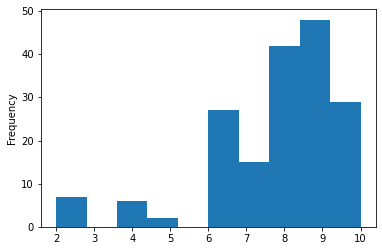

In [19]:
# For review_scores_cleanliness
df_listing_low['review_scores_cleanliness'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

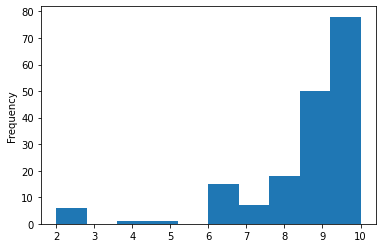

In [20]:
# For review_scores_checkin
df_listing_low['review_scores_checkin'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

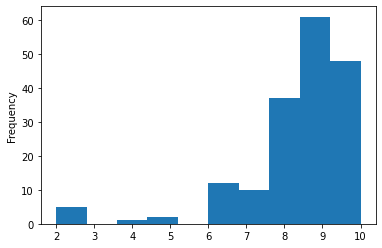

In [21]:
# For review_scores_communication
df_listing_low['review_scores_communication'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

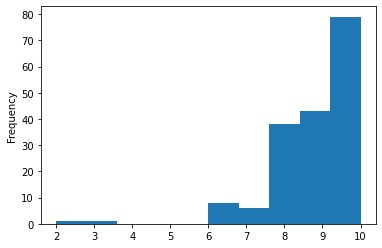

In [22]:
# For review_scores_location
df_listing_low['review_scores_location'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

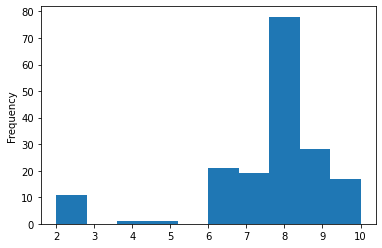

In [23]:
# For review_scores_value
df_listing_low['review_scores_value'].plot(kind="hist")

#### Findings: Here, most of the people has given less score for 'review_scores_accuracy' and 'review_scores_cleanliness' as the frequency for low score is high for those columns. So, host should look into those areas to improve there performance. 

### Lets find if there is correralation between number_of_reviews and other columns

In [24]:
# Amenities
df_listings['amenities'].describe()

count                                                  4335
unique                                                 3649
top       ["Iron", "TV", "Hangers", "Private entrance", ...
freq                                                     47
Name: amenities, dtype: object

Since, there are lot of amenities provided in each of the rooms, we count the number of amenities and store it in a new column

In [25]:
df_listings['amenities_total'] = 0
for i in range(len(df_listings['amenities'])):
    df_listings['amenities_total'][i] = len(df_listings['amenities'][i].split(','))
    

<ipython-input-25-f8ed4a5e8643>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings['amenities_total'][i] = len(df_listings['amenities'][i].split(','))


In [26]:
df_listings['amenities_total'].head()

0    36
1    33
2    42
3    46
4    27
Name: amenities_total, dtype: int64

- Removing the $ sign from 'price'
- Finding a new column: 'prices_per_bed' by dividing 'prices' with number of 'beds' available. 

In [27]:
df_listings['price'] = df_listings['price'].apply(lambda x: x.split('$')[1].replace(',', '')).astype(float)
df_listings['prices_per_bed'] = df_listings['price']/df_listings['beds']

In [28]:
# Collecting all the columns for avabilabity, reviews, amenities and prices
df_listing_avability = df_listings[['availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','amenities_total' , 'prices_per_bed']]

In [29]:
df_listing_avability_corr = df_listing_avability.corr()
df_listing_avability_corr

availability_30  availability_60  availability_90  \
availability_30                1.000000         0.921607         0.840670   
availability_60                0.921607         1.000000         0.961392   
availability_90                0.840670         0.961392         1.000000   
availability_365               0.336184         0.414962         0.492933   
number_of_reviews             -0.093429        -0.092365        -0.084375   
number_of_reviews_ltm         -0.093060        -0.073508        -0.071140   
number_of_reviews_l30d        -0.020624         0.005672         0.008714   
amenities_total               -0.137151        -0.106285        -0.078317   
prices_per_bed                 0.103939         0.099363         0.081263   

                        availability_365  number_of_reviews  \
availability_30                 0.336184          -0.093429   
availability_60                 0.414962          -0.092365   
availability_90                 0.492933          -0.084375   
availability_365                1.000000          -0.064956   
number_of_reviews              -0.064956           1.000000   
number_of_reviews_ltm          -0.133681           0.620759   
number_of_reviews_l30d         -0.078239           0.368335   
amenities_total                 0.011839           0.098674   
prices_per_bed                  0.085445          -0.130329   

                        number_of_reviews_ltm  number_of_reviews_l30d  \
availability_30                     -0.093060               -0.020624   
availability_60                     -0.073508                0.005672   
availability_90                     -0.071140                0.008714   
availability_365                    -0.133681               -0.078239   
number_of_reviews                    0.620759                0.368335   
number_of_reviews_ltm                1.000000                0.725943   
number_of_reviews_l30d               0.725943                1.000000   
amenities_total                      0.172818                0.130497   
prices_per_bed                      -0.175373               -0.129044   

                        amenities_total  prices_per_bed  
availability_30               -0.137151        0.103939  
availability_60               -0.106285        0.099363  
availability_90               -0.078317        0.081263  
availability_365               0.011839        0.085445  
number_of_reviews              0.098674       -0.130329  
number_of_reviews_ltm          0.172818       -0.175373  
number_of_reviews_l30d         0.130497       -0.129044  
amenities_total                1.000000       -0.143206  
prices_per_bed                -0.143206        1.000000

<AxesSubplot:>

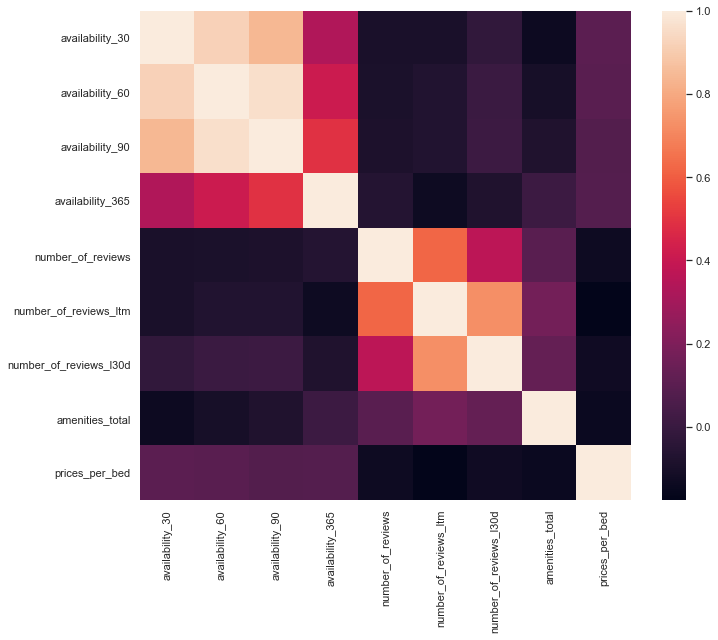

In [30]:
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_listing_avability_corr)

### Findings
- Negative correlation between 'availability_365' and 'number_of_reviews_ltm'
- Negative correlation between 'price_per_bed' and 'number_of_reviews_ltm'
- Positive correlation between 'amenities_total' and 'number_of_reviews_ltm'

Plotting some categorical variables

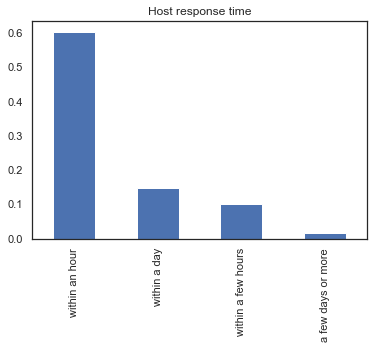

In [31]:
# Plotting host_response_time
host_response_vals = df_listings['host_response_time'].value_counts()
(host_response_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("Host response time");

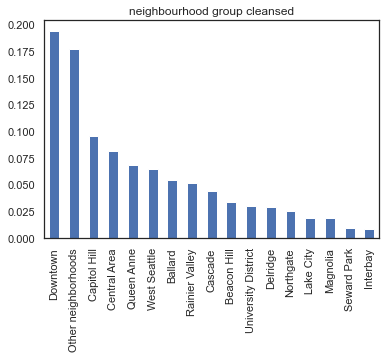

In [32]:
# Plotting neighborhood_group_cleansed
neigh_vals = df_listings['neighbourhood_group_cleansed'].value_counts()
(neigh_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("neighbourhood group cleansed");

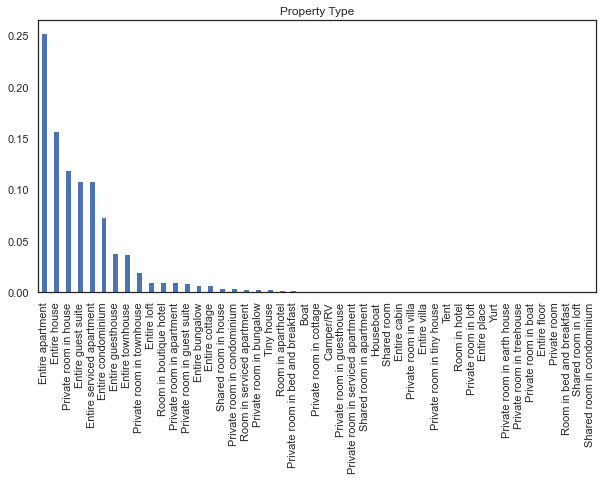

In [33]:
# Plotting property_type
prop_vals = df_listings['property_type'].value_counts()
(prop_vals/df_listings.shape[0]).plot(kind="bar", figsize=(10, 5));
plt.title("Property Type");

### Relation beween host_response_time and availability_365

<AxesSubplot:ylabel='availability_365'>

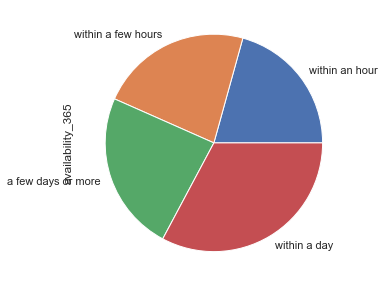

In [34]:
df_listings.groupby(['host_response_time'])['availability_365'].mean().sort_values().plot.pie(figsize=(5, 5))

### Findings
- Listings who responds 'within an hour' has highest occupancy rate and lowest 'availability_365' followed by 'within a few hours', 'within a day' and 'a few days or more'

### Trying to find if there is any correration between 'host_is_superhost' and other varaibles like 'host_response_rate' and 'host_acceptance_rate' to find out if thre is a any pattern if host is a superhost

In [35]:
df_listings_host = df_listings[['host_response_rate', 'host_acceptance_rate', 'host_is_superhost']]

In [36]:
df_listings_host.dropna(inplace=True)
df_listings_host.head()

<ipython-input-36-439fa8e39265>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_host.dropna(inplace=True)


host_response_rate host_acceptance_rate host_is_superhost
0               100%                  78%                 t
1               100%                  89%                 t
2               100%                  64%                 t
3               100%                  64%                 t
4                90%                  94%                 f

In [37]:
# Pre=processing to remove the $ sign and converting into float
df_listings_host['host_response_rate'] = df_listings_host['host_response_rate'].apply(lambda x: int(x.split('%')[0])).astype(float)
df_listings_host['host_acceptance_rate'] = df_listings_host['host_acceptance_rate'].apply(lambda x: x.split('%')[0]).astype(float)

<ipython-input-37-1fbe2075e42a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_host['host_response_rate'] = df_listings_host['host_response_rate'].apply(lambda x: int(x.split('%')[0])).astype(float)
<ipython-input-37-1fbe2075e42a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_host['host_acceptance_rate'] = df_listings_host['host_acceptance_rate'].apply(lambda x: x.split('%')[0]).astype(float)


<AxesSubplot:ylabel='host_response_rate'>

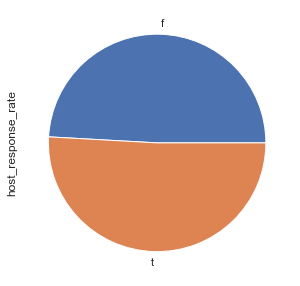

In [38]:
df_listings_host.groupby('host_is_superhost')['host_response_rate'].mean().plot.pie(figsize=(5, 5))

<AxesSubplot:ylabel='host_acceptance_rate'>

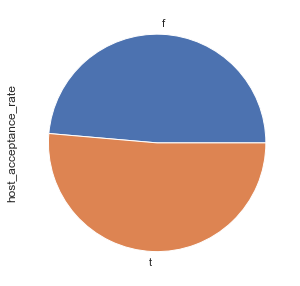

In [39]:
df_listings_host.groupby('host_is_superhost')['host_acceptance_rate'].mean().plot.pie(figsize=(5, 5))

### Findings 
- There are slightly more superhost than normal host
- There is a slightly high 'host_acceptance_rate' by the customers when host is superhost

### Finding the pattern of when 'host_is_superhost' and how they are listing their property for 'minimum_nights'

In [40]:
df_listings.groupby(['host_is_superhost', 'minimum_nights'])['minimum_nights'].mean()

host_is_superhost  minimum_nights
f                  1                   1
                   2                   2
                   3                   3
                   4                   4
                   5                   5
                                    ... 
t                  91                 91
                   120               120
                   180               180
                   183               183
                   210               210
Name: minimum_nights, Length: 62, dtype: int64

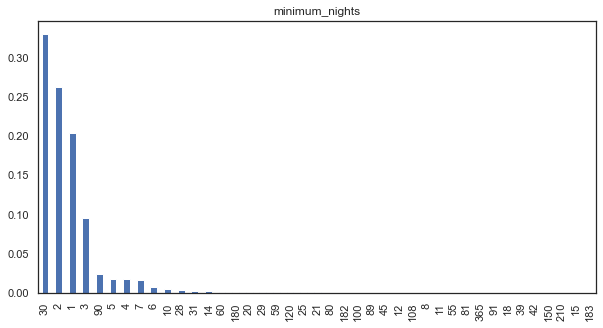

In [41]:
minimum_nights = df_listings['minimum_nights'].value_counts()
(minimum_nights/df_listings.shape[0]).plot(kind="bar", figsize=(10, 5));
plt.title("minimum_nights");

In [43]:
df_listings['minimum_nights'].unique()

array([  1,   2,  28,   5,   4,  30,   7, 120,   3,  60,  14,  81,  90,
         6,  25,  31,  10,  59, 100,  45,  29,  20, 180, 183, 108,  80,
       182,  89, 365,   8,  39, 210,  11,  21, 150,  18,  55,  12,  15,
        91,  42], dtype=int64)

### Findings: Most of the hosts have given minimum nights as 1-10 or 30 or 90 days

### Binning the minimum_nights_bin into bins and converting it into categorical values

In [44]:
#df_listings['minimum_nights_bin'] = pd.qcut(df_listings['minimum_nights'], q=4)
edges = [0, 2, 5, 7, 30, df_listings['minimum_nights'].max()]

df_listings['minimum_nights_bin'] = pd.cut(df_listings['minimum_nights'], edges)

In [45]:
df_listings['minimum_nights_bin']

0        (0, 2]
1        (0, 2]
2       (7, 30]
3        (2, 5]
4        (2, 5]
         ...   
4330     (0, 2]
4331     (0, 2]
4332     (0, 2]
4333     (0, 2]
4334    (7, 30]
Name: minimum_nights_bin, Length: 4335, dtype: category
Categories (5, interval[int64]): [(0, 2] < (2, 5] < (5, 7] < (7, 30] < (30, 365]]

In [46]:
df_listings_minimum_nights = df_listings[['host_is_superhost', 'minimum_nights_bin' ]]
df_listings_minimum_nights.head()

host_is_superhost minimum_nights_bin
0                 t             (0, 2]
1                 t             (0, 2]
2                 t            (7, 30]
3                 t             (2, 5]
4                 f             (2, 5]

In [47]:
df_listings_minimum_nights.groupby(['host_is_superhost', 'minimum_nights_bin'])['minimum_nights_bin'].count()

host_is_superhost  minimum_nights_bin
f                  (0, 2]                 921
                   (2, 5]                 222
                   (5, 7]                  46
                   (7, 30]                897
                   (30, 365]               38
t                  (0, 2]                1091
                   (2, 5]                 346
                   (5, 7]                  53
                   (7, 30]                598
                   (30, 365]              115
Name: minimum_nights_bin, dtype: int64

### Findings: 
- When host is a superhost, they have given more importance to minimum_nights in the range of (0, 5) days and then above 30 days.
- When host is not a superhost, they have given less importance to minimum_nights in the range of (0, 5) and more importance to stay above 7 days, upto 30 days for more occupancy. 

### Let's find the occupancy rate w.r.t to other columns like 'availability_365', 'host_neighbourhood', etc.
- occupancy_rate = percentage of days the rooms was available in a year
- more occupancy_rate, the better

In [48]:
df_listings['occupancy_rate'] = df_listings['availability_365'].apply(lambda x: (365-x)/365).astype(float)
df_listings['occupancy_rate'].head()

0    0.928767
1    0.002740
2    0.194521
3    0.136986
4    0.983562
Name: occupancy_rate, dtype: float64

In [49]:
df_listings_property = df_listings[['host_neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'occupancy_rate' ]]

<AxesSubplot:xlabel='host_neighbourhood'>

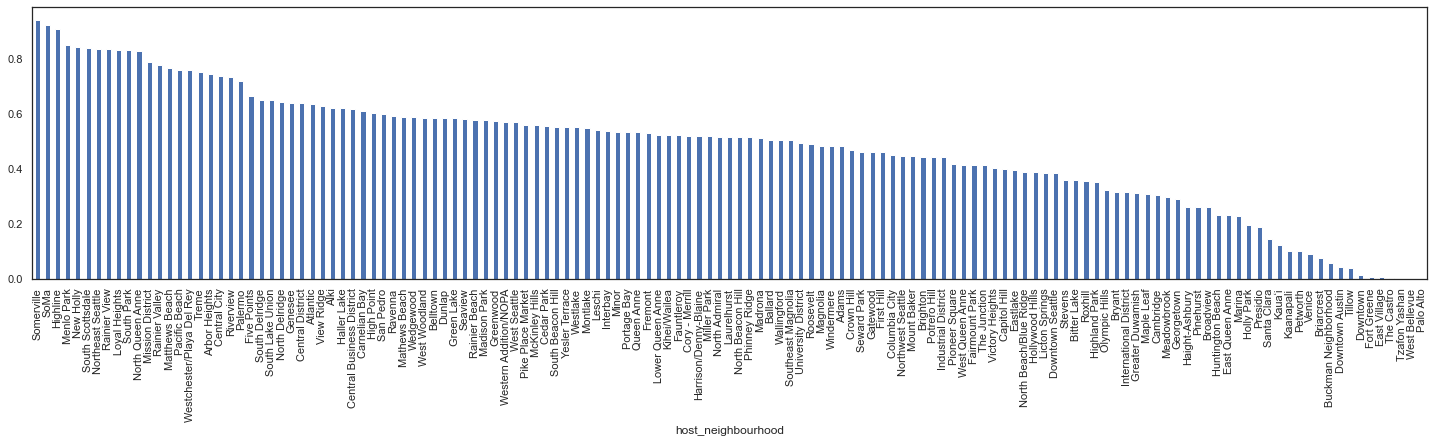

In [50]:
df_listings_property.groupby('host_neighbourhood')['occupancy_rate'].mean().sort_values( ascending=False).plot(kind="bar", figsize=(25, 5))

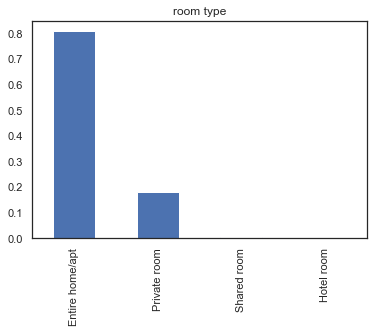

In [51]:
# Plotting room_type
prop_vals = df_listings['room_type'].value_counts()
(prop_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("room type");

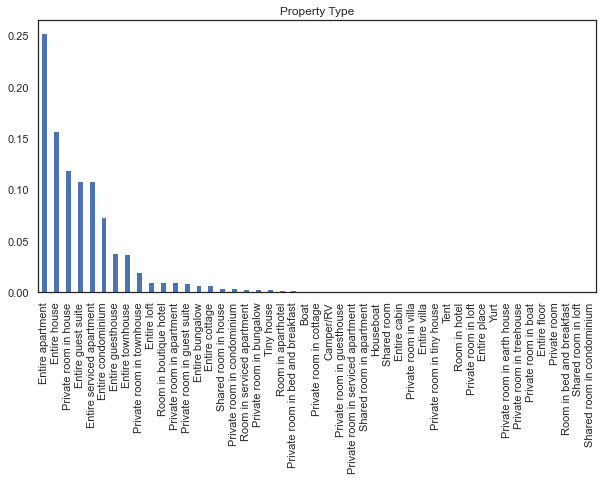

In [52]:
# Plotting property_type
prop_vals = df_listings['property_type'].value_counts()
(prop_vals/df_listings.shape[0]).plot(kind="bar", figsize=(10, 5));
plt.title("Property Type");

<AxesSubplot:xlabel='room_type'>

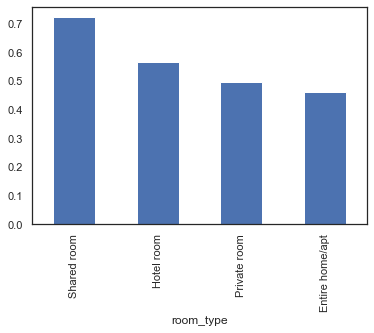

In [53]:
df_listings_property.groupby('room_type')['occupancy_rate'].mean().sort_values( ascending=False).plot(kind="bar")

### Findings
- Most of the property are listed as Entire apartment or Entire house followed by other listings
- Most of the room types is Entire house/apt followed by some private rooms
- The occupancy rate is high for shared rooms and hotel rooms, which has lowest listings, and almost equal for Private rooms and Entire house/apt

In [54]:
df_listings['accommodates'].unique()

array([ 9,  2,  4,  3,  1,  8,  6, 10,  5, 16,  7, 12, 11, 15, 13, 14],
      dtype=int64)

<AxesSubplot:xlabel='accommodates'>

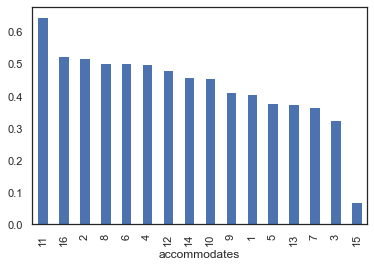

In [55]:
df_listings_property.groupby('accommodates')['occupancy_rate'].mean().sort_values( ascending=False).plot(kind="bar")

### Findings
- Occupancy rate is high for even accommodates, except for 11 accomodates
- High occupancy rate for 2-8 people

In [56]:
df_listings_bed_ = df_listings[['host_neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'prices_per_bed', 'room_type' ]]

<AxesSubplot:xlabel='room_type'>

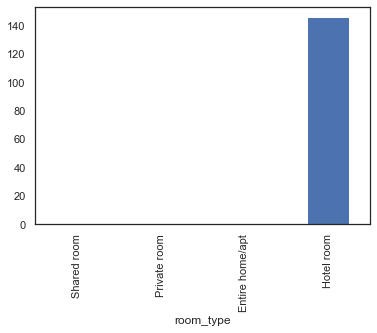

In [57]:
df_listings_bed_.groupby('room_type')['prices_per_bed'].mean().sort_values( ascending=False).plot(kind="bar")

### Findings
- Per bed cost of hotel room is significantly high compared to others

### Neighbourhood where prices per bed is high

<AxesSubplot:xlabel='host_neighbourhood'>

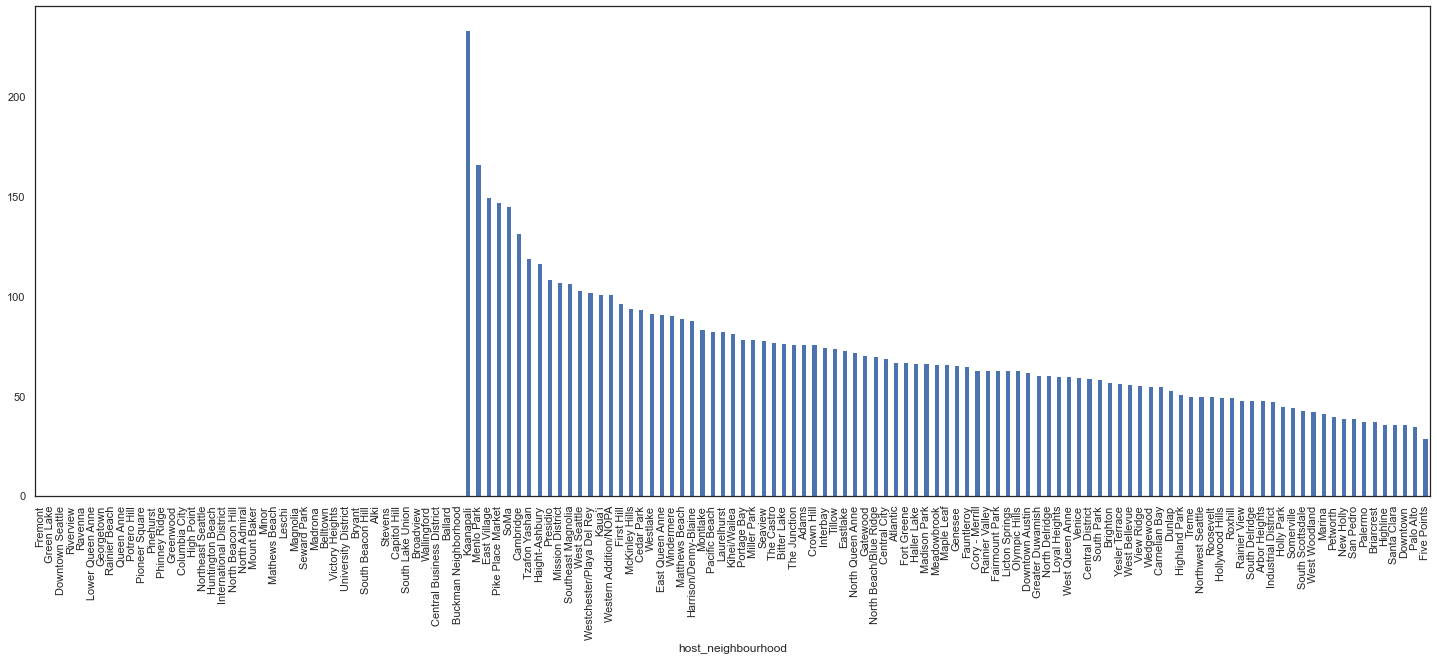

In [58]:
df_listings_bed_.groupby('host_neighbourhood')['prices_per_bed'].mean().sort_values(ascending=False).plot(kind="bar", figsize=(25, 9))

# Calender

In [59]:
# Read in the calendar data set
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0    22153582  2020-10-25         t  $144.00        $144.00               3   
1    22153582  2020-10-26         t  $141.00        $141.00               3   
2    22153582  2020-10-27         t  $149.00        $149.00               3   
3    22153582  2020-10-28         t   $96.00         $96.00               3   
4    22153582  2020-10-29         t  $102.00        $102.00               3   

   maximum_nights  
0            1125  
1            1125  
2            1125  
3            1125  
4            1125

In [60]:
df_calendar['price'] = df_calendar['price'].apply(lambda x: x.split('$')[1].replace(',', '')).astype(float)
df_calendar['adjusted_price'] = df_calendar['adjusted_price'].apply(lambda x: x.split('$')[1].replace(',', '')).astype(float)

### Finding months when discounts are given

In [61]:
# Finding discount
df_calendar['discount'] = ((df_calendar['price'] - df_calendar['adjusted_price']) * 100 )/(df_calendar['price'])

In [62]:
df_calendar_discount = df_calendar[df_calendar['discount'] > 0]
df_calendar_discount.head()

listing_id        date available  price  adjusted_price  minimum_nights  \
366    22160061  2020-10-25         f  229.0           183.0               1   
367    22160061  2020-10-26         f  229.0           183.0               1   
368    22160061  2020-10-27         t  229.0           183.0               1   
369    22160061  2020-10-28         t  229.0           206.0               1   
370    22160061  2020-10-29         t  229.0           218.0               2   

     maximum_nights   discount  
366            1125  20.087336  
367            1125  20.087336  
368            1125  20.087336  
369            1125  10.043668  
370            1125   4.803493

In [63]:
# Plot the average price by month 
df_calendar['year'] = df_calendar['date'].apply(lambda x: x.split('-')[0])
df_calendar['month'] = df_calendar['date'].apply(lambda x: x.split('-')[1])

#### Finding the trend of prices

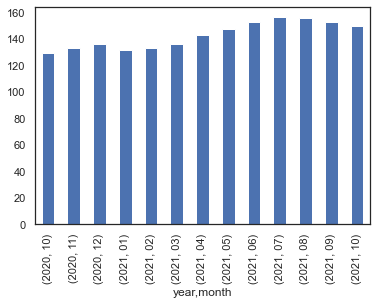

In [64]:
df_calendar.groupby(['year','month'])['price'].mean().plot(kind="bar");

#### Finding the trend of discounts

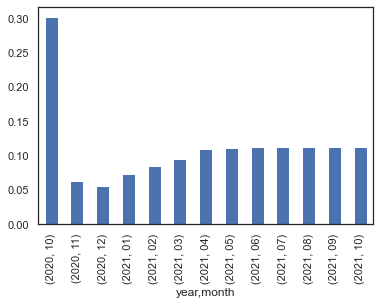

In [65]:

df_calendar.groupby(['year','month'])['discount'].mean().plot(kind="bar");

#### Finding the trend when prices are high than normal values

In [66]:
df_calendar_high = df_calendar[df_calendar['discount'] < 0]

<ipython-input-67-31e313ab86d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_high['year'] = pd.DatetimeIndex(df_calendar_high['date']).year
<ipython-input-67-31e313ab86d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_high['month'] = pd.DatetimeIndex(df_calendar_high['date']).month


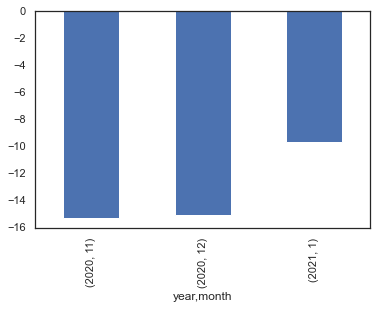

In [67]:
# Plot the average price by month 
df_calendar_high['year'] = pd.DatetimeIndex(df_calendar_high['date']).year
df_calendar_high['month'] = pd.DatetimeIndex(df_calendar_high['date']).month

df_calendar_high.groupby(['year','month'])['discount'].mean().plot(kind="bar");

### Findings:
- There is discrepancy in the data as the months mentioned are of year 2021
- Prices are high for Jun to Oct
- High discounts are offered in Nov
- Prices are rooms are increased in Nov-Jan

## Review dataset

In [68]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

listing_id         id        date  reviewer_id reviewer_name  \
0        2318        146  2008-09-15         2451         Kevin   
1        2318  126302712  2017-01-10     12332845       Jessica   
2        2318  140977084  2017-04-01      4789466          Ivan   
3        2318  147262504  2017-04-25     55817131          Mike   
4        2318  161806368  2017-06-18    113604590          Pete   

                                            comments  
0        1000 times better than staying at a hotel.   
1  Our family (two couples, a two year old and an...  
2  Top of the list locations we have stayed at! T...  
3  SUCH an awesome place. Very clean, quiet and s...  
4  We flew quite a distance to be at our only dau...

In [69]:
df_comments = df_reviews[['listing_id', 'comments']].copy()
df_comments.head()

listing_id                                           comments
0        2318        1000 times better than staying at a hotel. 
1        2318  Our family (two couples, a two year old and an...
2        2318  Top of the list locations we have stayed at! T...
3        2318  SUCH an awesome place. Very clean, quiet and s...
4        2318  We flew quite a distance to be at our only dau...

### Finding sentiments of the comments

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def sentiment_scores(sentence):

    sentence = str(sentence)
    val = analyser.polarity_scores(sentence)
    return val['compound']


df_comments['polarity_score'] = df_comments['comments'].apply(sentiment_scores)
df_comments.head()

listing_id                                           comments  \
0        2318        1000 times better than staying at a hotel.    
1        2318  Our family (two couples, a two year old and an...   
2        2318  Top of the list locations we have stayed at! T...   
3        2318  SUCH an awesome place. Very clean, quiet and s...   
4        2318  We flew quite a distance to be at our only dau...   

   polarity_score  
0          0.4404  
1          0.9975  
2          0.9796  
3          0.9059  
4          0.8381

In [72]:
print('Positive scores: ',df_comments['polarity_score'][df_comments['polarity_score'] > 0].count())
print('Negative scores: ',df_comments['polarity_score'][df_comments['polarity_score'] < 0].count())
print('Neutral scores: ',df_comments['polarity_score'][df_comments['polarity_score'] == 0].count())

Positive scores:  261173
Negative scores:  3245
Neutral scores:  6457


### Findings:
- Most visitors have given positive comments, followed by neutral and negative